In [312]:
#coding: utf-8
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 900)

train_data = pd.read_csv("./train.csv")
train_lavel = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")
test_lavel = pd.read_csv("./gender_submission.csv")

In [313]:
def name_classifier(name_df):
    name_class_df = []
    
    for name in name_df:
        if 'Miss' in name:
            name_class_df.append(1)
        elif 'Mrs' in name:
            name_class_df.append(2)
        elif 'Master' in name:
            name_class_df.append(3)
        elif 'Mr' in name:
            name_class_df.append(4)
        else:
            name_class_df.append(0)

    nc = pd.DataFrame(name_class_df, columns={'Class'})
    return nc

In [314]:
def age_identifier(data, age_class):
    
    age_result = []
    for row in range(0, len(data)):
        df = data.iloc[row]
        if 1 > df.Age >= 0: 
            age_result.append(1)
        elif df.Age >= 1:
            age_result.append(df.Age)
        else:
            if df.Class == 1:
                age_result.append(age_class[1])
            elif df.Class == 2:
                age_result.append(age_class[2])
            elif df.Class == 3:
                age_result.append(age_class[3])
            elif df.Class == 4:
                age_result.append(age_class[4])
            elif df.Class == 0:
                age_result.append(age_class[0])
                
    data = data.drop((["Age"]), axis=1)
    ar = pd.DataFrame(age_result, columns={'Age'})
    data = pd.concat((data, ar), axis=1)
   
    return data


In [315]:
tn = train_data["Name"]
tnc = name_classifier(tn)
train_age_class = pd.concat((train_data["Age"], tnc), axis=1)
train_data = pd.concat((train_data, tnc), axis=1)
#print(train_data)

sn = test_data["Name"]
snc = name_classifier(sn)
test_age_class = pd.concat((test_data["Age"], snc), axis=1)
test_data = pd.concat((test_data, snc), axis=1)
#print(test_data)

ac = pd.concat((train_age_class, test_age_class), axis=0)
age_class = ac.groupby(["Class"]).agg(['mean']).astype(int)
age_class = list(age_class.values.flatten())
#print(age_class)

In [316]:
Sex_Dummy = pd.get_dummies(train_data["Sex"])
train_data = pd.concat((train_data, Sex_Dummy), axis=1)
train_data = train_data.drop((["Sex", "female"]), axis=1)

train_data["Embarked"] = train_data["Embarked"].fillna("N")
train_data["Embarked_No"] = train_data["Embarked"].map({"N": 0, "S": 1, "C": 2, "Q": 3}).astype(int)
train_data = train_data.drop((["Embarked"]), axis=1)

train_data = age_identifier(train_data, age_class)
train_data["Fare"] = train_data["Fare"].fillna(0)

train_data = train_data.drop((["PassengerId","Name","SibSp","Parch","Survived","Ticket","Cabin"]), axis=1)
#train_data = train_data.drop((["PassengerId","Name","Survived","Ticket","Cabin"]), axis=1)
print(train_data)

     Pclass      Fare  Class  male  Embarked_No   Age
0         3    7.2500      4     1            1  22.0
1         1   71.2833      2     0            2  38.0
2         3    7.9250      1     0            1  26.0
3         1   53.1000      2     0            1  35.0
4         3    8.0500      4     1            1  35.0
5         3    8.4583      4     1            3  32.0
6         1   51.8625      4     1            1  54.0
7         3   21.0750      3     1            1   2.0
8         3   11.1333      2     0            1  27.0
9         2   30.0708      2     0            2  14.0
10        3   16.7000      1     0            1   4.0
11        1   26.5500      1     0            1  58.0
12        3    8.0500      4     1            1  20.0
13        3   31.2750      4     1            1  39.0
14        3    7.8542      1     0            1  14.0
15        2   16.0000      2     0            1  55.0
16        3   29.1250      3     1            3   2.0
17        2   13.0000      4

In [317]:
train_lavel = train_lavel.drop((["PassengerId","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]), axis=1)
train_lavel = np.ravel(train_lavel)
#print(train_lavel)

In [318]:
ids = test_data["PassengerId"].values

Sex_Dummy = pd.get_dummies(test_data["Sex"])
test_data = pd.concat((test_data, Sex_Dummy), axis=1)
test_data = test_data.drop((["Sex", "female"]), axis=1)

test_data["Embarked"] = test_data["Embarked"].fillna("N")
test_data["Embarked_No"] = test_data["Embarked"].map({"N": 0, "S": 1, "C": 2, "Q": 3}).astype(int)
test_data = test_data.drop((["Embarked"]), axis=1)

test_data = age_identifier(test_data, age_class)
test_data["Fare"] = test_data["Fare"].fillna(0)

test_data = test_data.drop((["PassengerId","Name","SibSp","Parch","Ticket","Cabin"]), axis=1)
#test_data = test_data.drop((["PassengerId","Name","Ticket","Cabin"]), axis=1)
print(test_data)

     Pclass      Fare  Class  male  Embarked_No   Age
0         3    7.8292      4     1            3  34.5
1         3    7.0000      2     0            1  47.0
2         2    9.6875      4     1            3  62.0
3         3    8.6625      4     1            1  27.0
4         3   12.2875      2     0            1  22.0
5         3    9.2250      4     1            1  14.0
6         3    7.6292      1     0            3  30.0
7         2   29.0000      4     1            1  26.0
8         3    7.2292      2     0            2  18.0
9         3   24.1500      4     1            1  21.0
10        3    7.8958      4     1            1  32.0
11        1   26.0000      4     1            1  46.0
12        1   82.2667      2     0            1  23.0
13        2   26.0000      4     1            1  63.0
14        1   61.1750      2     0            1  47.0
15        2   27.7208      2     0            2  24.0
16        2   12.3500      4     1            3  35.0
17        3    7.2250      4

In [319]:
test_lavel = test_lavel.drop((["PassengerId"]), axis=1)
test_lavel = np.ravel(test_lavel)
#print(test_lavel)

In [326]:
from sklearn import ensemble
from sklearn.metrics import accuracy_score

clf = ensemble.RandomForestClassifier(min_samples_split=230)
clf.fit(train_data, train_lavel)
pred = clf.predict(test_data)
accuracy_score(np.ravel(test_lavel), pred)

0.99521531100478466

In [327]:
import csv
submit_file = open("./titanic_submit_RandomForestClassifier.csv", "w")
file_object = csv.writer(submit_file)
file_object.writerow(["PassengerId", "Survived"])
file_object.writerows(zip(ids, pred))
submit_file.close()

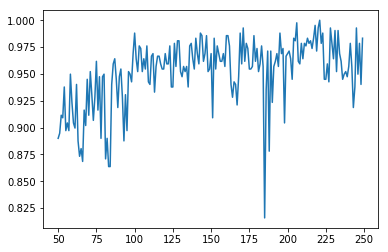

In [325]:
%matplotlib inline
import matplotlib.pyplot as plt

accuracy = []
i_range = []
for i in range(50, 250):
    clf = ensemble.RandomForestClassifier(min_samples_split=i)
    clf.fit(train_data, train_lavel)
    pred = clf.predict(test_data)
    acc = accuracy_score(np.ravel(test_lavel), pred)
    accuracy.append(acc)
    i_range.append(i)

#print(accuracy)
x = i_range
y = accuracy
plt.plot(x, y)